In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# fpath = "F:\\pp1_data_processing\\2023-05-22_21-17-37 dac showing pacman.csv"
fpath = "F:\\pp1_data_processing\\2023-05-22_22-36-06 dac showing pacman 200MHz.csv"
# fpath = "C:\\Users\\ionca\\Desktop\\pp1\\2023-05-23_17-58-21 dac 200MHz one line.csv"
df = pd.read_csv(fpath)

In [146]:
# get all the falling edges of !vid_conv where the dac data is latched
conv_diffs = df[' !VID_CONV'].diff()
dacdf = df.loc[conv_diffs == -1].copy()
dacdf.reset_index(inplace=True, drop=True)
dacdf.drop(columns=' !VID_CONV', inplace=True)
dacdf

,Time[s],DAC0,DAC1,DAC2,DAC3,DAC4,DAC5,DAC6,DAC7,VID_BLK
0,-0.024999,1,1,1,1,0,1,0,0,0
1,-0.024999,1,1,1,1,1,1,0,0,0
2,-0.024998,1,0,1,0,1,1,0,0,0
3,-0.024998,1,0,1,0,1,1,0,0,0
4,-0.024998,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7159302,0.475001,1,1,0,0,0,1,0,0,0
7159303,0.475001,1,0,0,0,0,1,0,0,0
7159304,0.475001,1,0,1,0,0,1,1,0,0
7159305,0.475001,0,1,1,1,1,0,0,0,0


In [147]:
# convert binary columns to numpy
bits_arr = dacdf[[' DAC0', ' DAC1', ' DAC2', ' DAC3', ' DAC4', ' DAC5', ' DAC6', ' DAC7']].to_numpy()
# convert to decimal
decimal_arr = np.sum(bits_arr * (2**np.arange(0,8)), axis=1)
# store in new column
dacdf['VALUE'] = decimal_arr

# combine values with VID_BLK to create the video signal
dacdf['SIGNAL'] = dacdf['VALUE']
dacdf.loc[dacdf[' VID_BLK'] == 1, 'SIGNAL'] = 0
dacdf.head()

,Time[s],DAC0,DAC1,DAC2,DAC3,DAC4,DAC5,DAC6,DAC7,VID_BLK,VALUE,SIGNAL
0,-0.024999,1,1,1,1,0,1,0,0,0,47,47
1,-0.024999,1,1,1,1,1,1,0,0,0,63,63
2,-0.024998,1,0,1,0,1,1,0,0,0,53,53
3,-0.024998,1,0,1,0,1,1,0,0,0,53,53
4,-0.024998,1,0,0,0,0,0,1,0,0,65,65


C:\Users\ionca\AppData\Local\Temp\ipykernel_7044\4234514963.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dacdf.iloc[245:1300].plot(y=['SIGNAL', ' VID_BLK'], subplots=True, ax=ax, use_index=True)


array([<Axes: >, <Axes: >], dtype=object)

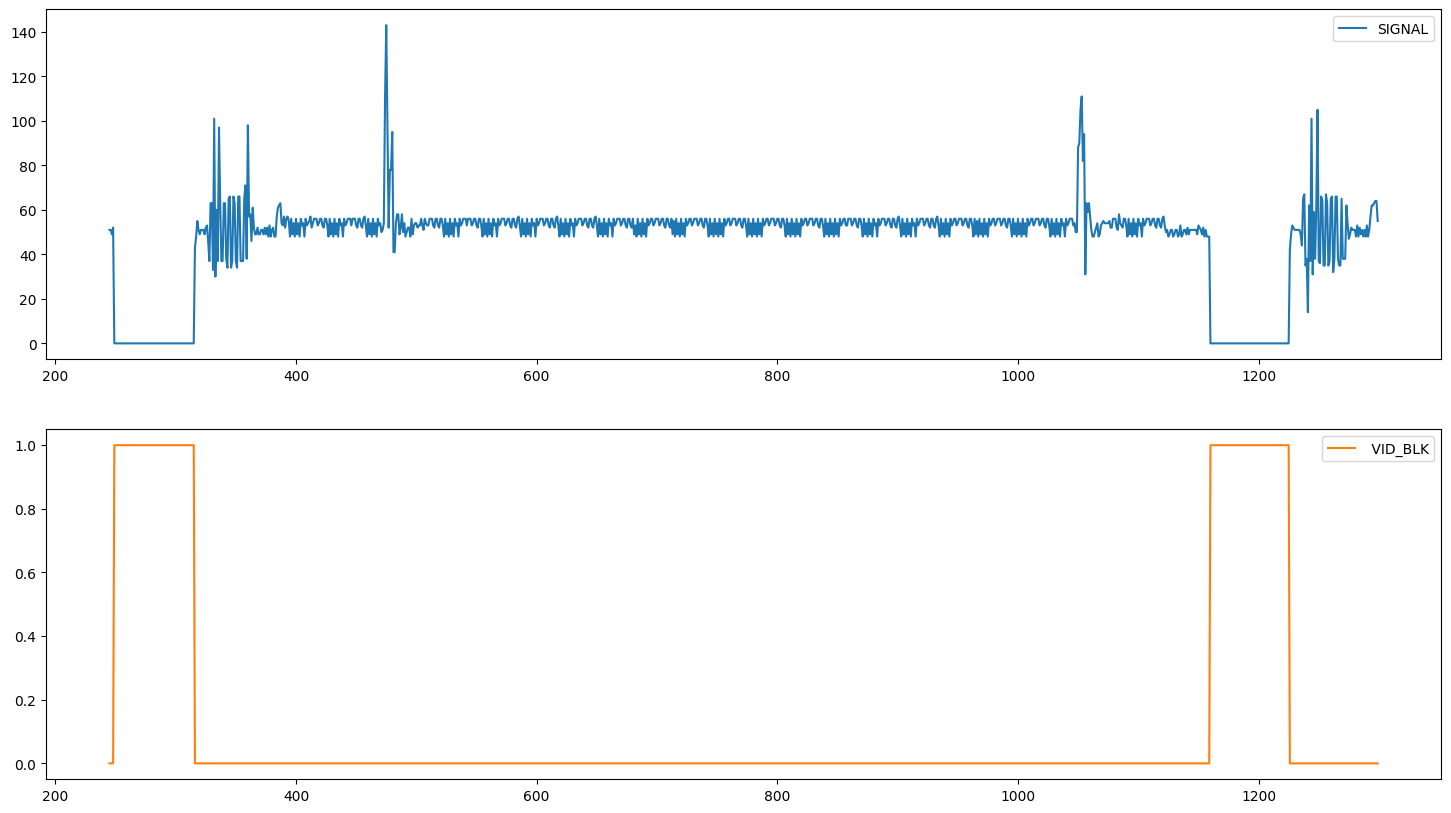

In [171]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
dacdf.iloc[245:1300].plot(y=['SIGNAL', ' VID_BLK'], subplots=True, ax=ax, use_index=True)

timing of vid signal where falling edge of horizontal sync pulse (blanking) is t=0s  
t=-2.5650us front porch  
t=0us vidblanking  
t=4.6200us back porch  
t=5.3250us colorburst  
t=8.1250us end colorburst  
t=9.6400us begin scanline  
t=61.250us end scanline  

In [212]:
# get start and end indices of each scanline
scanline_start_indices = dacdf[dacdf[' VID_BLK'].diff() == 1].iloc[:-1].index.to_series()
scanline_end_indices = dacdf[dacdf[' VID_BLK'].diff() == 1].iloc[1:].index.to_series()

# a list of dataframes that each contain a single scanline
scanlines = []
for start,end in zip(scanline_start_indices, scanline_end_indices):
    scanline = dacdf.loc[start:end, ['Time[s]', ' VID_BLK', 'VALUE']]
    scanline['datetime'] = pd.to_datetime(scanline['Time[s]'],unit='s')
    scanlines.append(scanline)

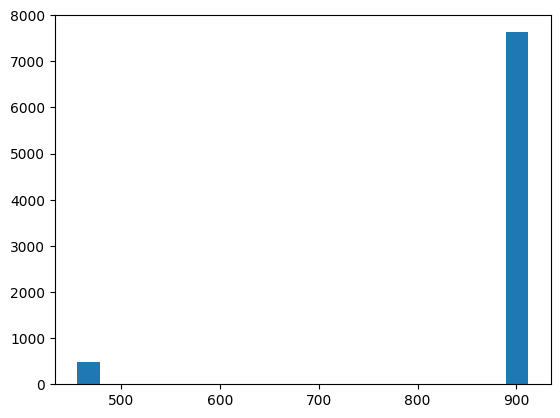

In [190]:
scanline_lengths = [x.shape[0] for x in scanlines]
plt.hist(scanline_lengths, bins=20)
plt.show()

In [191]:
for i in range(len(scanlines)):
    if scanlines[i].shape[0] < 800:
        print(i)

35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3545
3546
3547
3548
3549
3550
3551
3552


In [192]:
scanlines[35]

,Time[s],VID_BLK,VALUE
32100,-0.022757,1,43
32101,-0.022757,1,51
32102,-0.022757,1,51
32103,-0.022757,1,51
32104,-0.022757,1,51
...,...,...,...
32551,-0.022725,0,51
32552,-0.022725,0,52
32553,-0.022725,0,54
32554,-0.022725,0,48


In [193]:
scanlines[50]

,Time[s],VID_BLK,VALUE
38925,-0.022280,1,44
38926,-0.022280,1,51
38927,-0.022280,1,51
38928,-0.022280,1,51
38929,-0.022280,1,51
...,...,...,...
39376,-0.022249,0,51
39377,-0.022249,0,51
39378,-0.022248,0,52
39379,-0.022248,0,56


C:\Users\ionca\AppData\Local\Temp\ipykernel_7044\316461503.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dacdf[32100:43000].plot(y=['VALUE', ' VID_BLK'], subplots=True, ax=ax, use_index=True)


array([<Axes: >, <Axes: >], dtype=object)

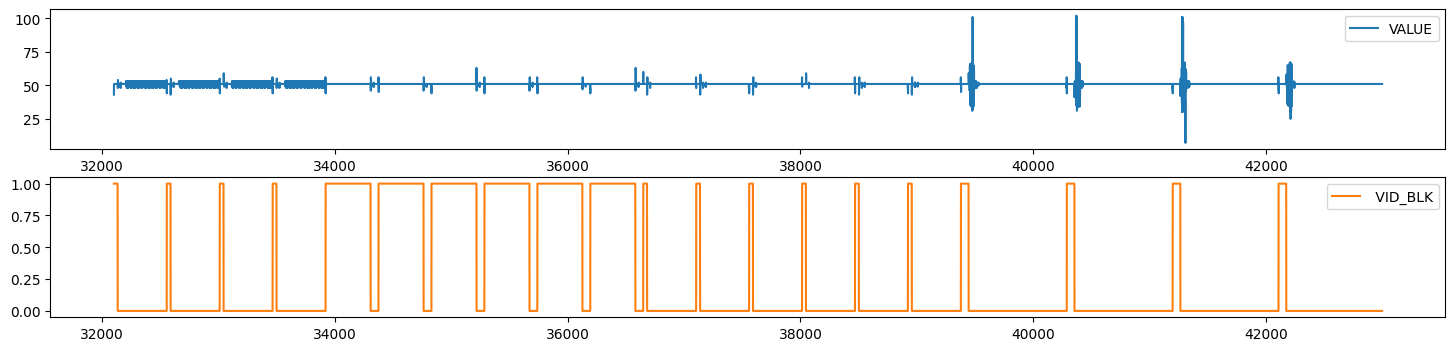

In [217]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
dacdf[32100:43000].plot(y=['VALUE', ' VID_BLK'], subplots=True, ax=ax, use_index=True)

C:\Users\ionca\AppData\Local\Temp\ipykernel_7044\2931157978.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scanlines[203].iloc[220:].plot(y=['VALUE',' VID_BLK'], subplots=True, ax=ax, use_index=True)


691


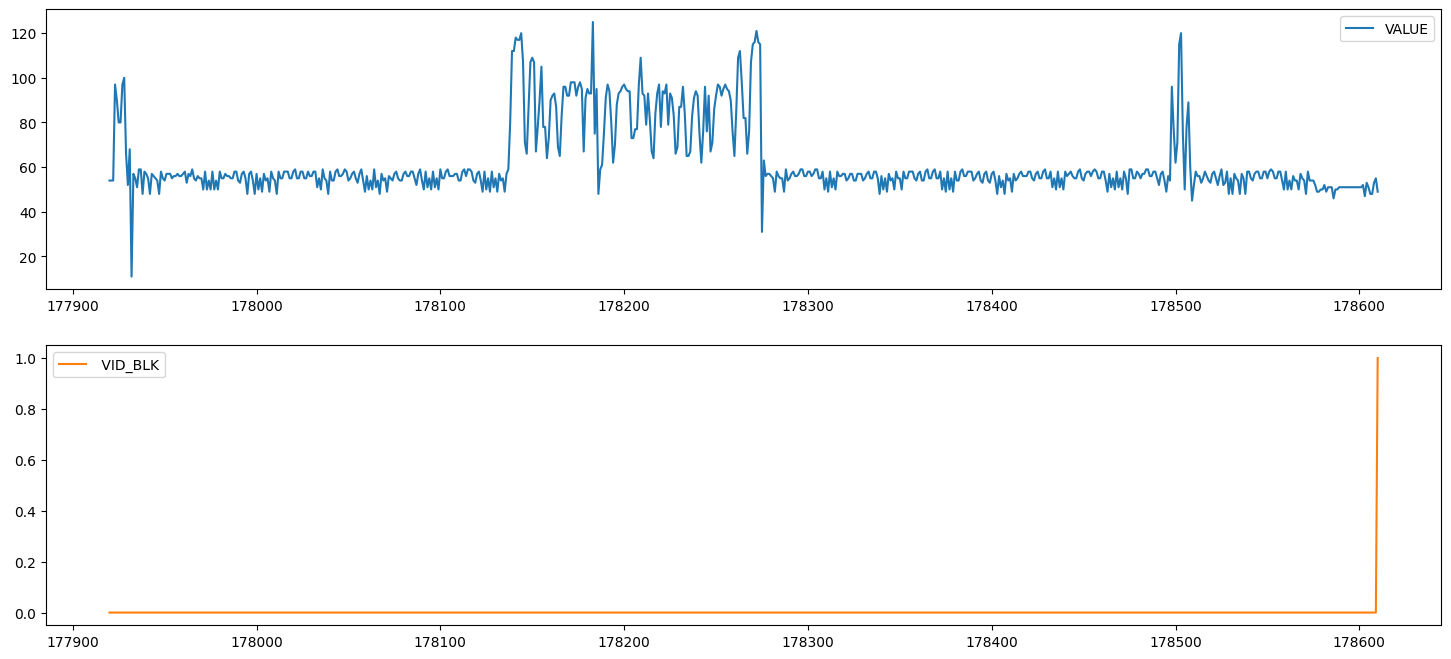

In [245]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
scanlines[203].iloc[220:].plot(y=['VALUE',' VID_BLK'], subplots=True, ax=ax, use_index=True)
print(len(scanlines[203].iloc[220:]))

In [262]:
scanlines[51]['VALUE'][220:]

39600    51
39601    51
39602    51
39603    51
39604    51
         ..
40286    51
40287    49
40288    48
40289    56
40290    44
Name: VALUE, Length: 691, dtype: int64

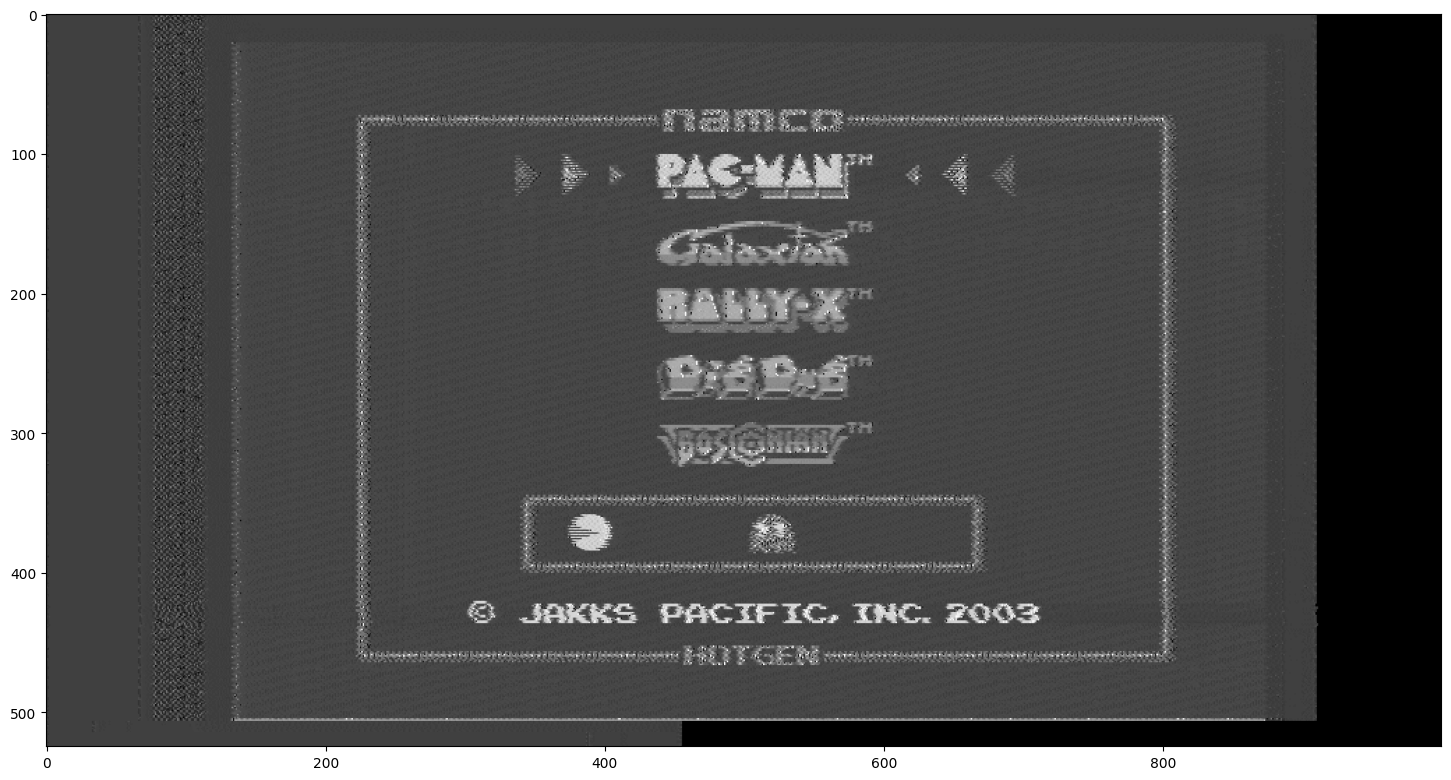

In [330]:
def extract_luma_from_scanlines(scanlines:list):
    scanline_start_offset = 0 # index in each scanline df where the visible part of the image begins
    h = 525
    w = int(4*h/3)+300
    row = 0
    image = np.ndarray((h,w))
    for line in scanlines[51:]:
        luma = line['VALUE'][scanline_start_offset:].to_numpy()
        end_index = len(luma)
        if end_index > w:
            end_index = w
        image[row,:end_index] = luma[:end_index]
        row+=2
        if row >= h:
            break
    
    last_line_index = row//2
    # odd field
    row = 1
    for line in scanlines[51 + last_line_index + 8:]:
        luma = line['VALUE'][scanline_start_offset:].to_numpy()
        end_index = len(luma)
        if end_index > w:
            end_index = w
        image[row,:end_index] = luma[:end_index]
        row+=2
        if row >= h:
            return image      

fig, ax = plt.subplots()
fig.set_size_inches(18,16)
image = extract_luma_from_scanlines(scanlines)
ax.imshow(image, 'Greys_r')
plt.show()